<a href="https://www.kaggle.com/code/bsrsrc/ann-based-breast-cancer-diagnosis-prediction?scriptVersionId=199476301" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import and Settings

In [1]:
import keras
import tensorflow as tf
print("Keras Current Version:", keras.__version__, "Tensoflow Current Version:", tf.__version__)

Keras Current Version: 3.3.3 Tensoflow Current Version: 2.16.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from joblib import dump, load
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

random.seed(46)
np.random.seed(46)
tf.random.set_seed(46)

In [3]:
breast_cancer = load_breast_cancer()
data = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

# Understanding Data

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
print(data['Unnamed: 32'].head(30))

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
Name: Unnamed: 32, dtype: float64


In [7]:
data = data.drop(["id", "Unnamed: 32"], axis=1)
data["diagnosis"] = data["diagnosis"].map({"M":1, "B":0})

In [8]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Visualization

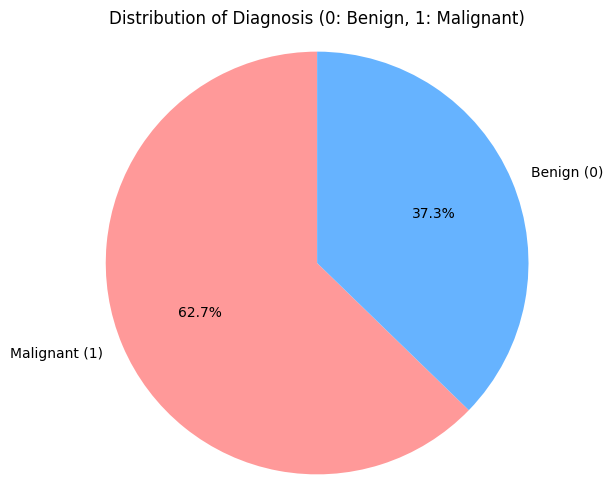

In [9]:
diagnosis_counts = data['diagnosis'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=['Malignant (1)', 'Benign (0)'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Distribution of Diagnosis (0: Benign, 1: Malignant)")
plt.axis('equal')
plt.show()

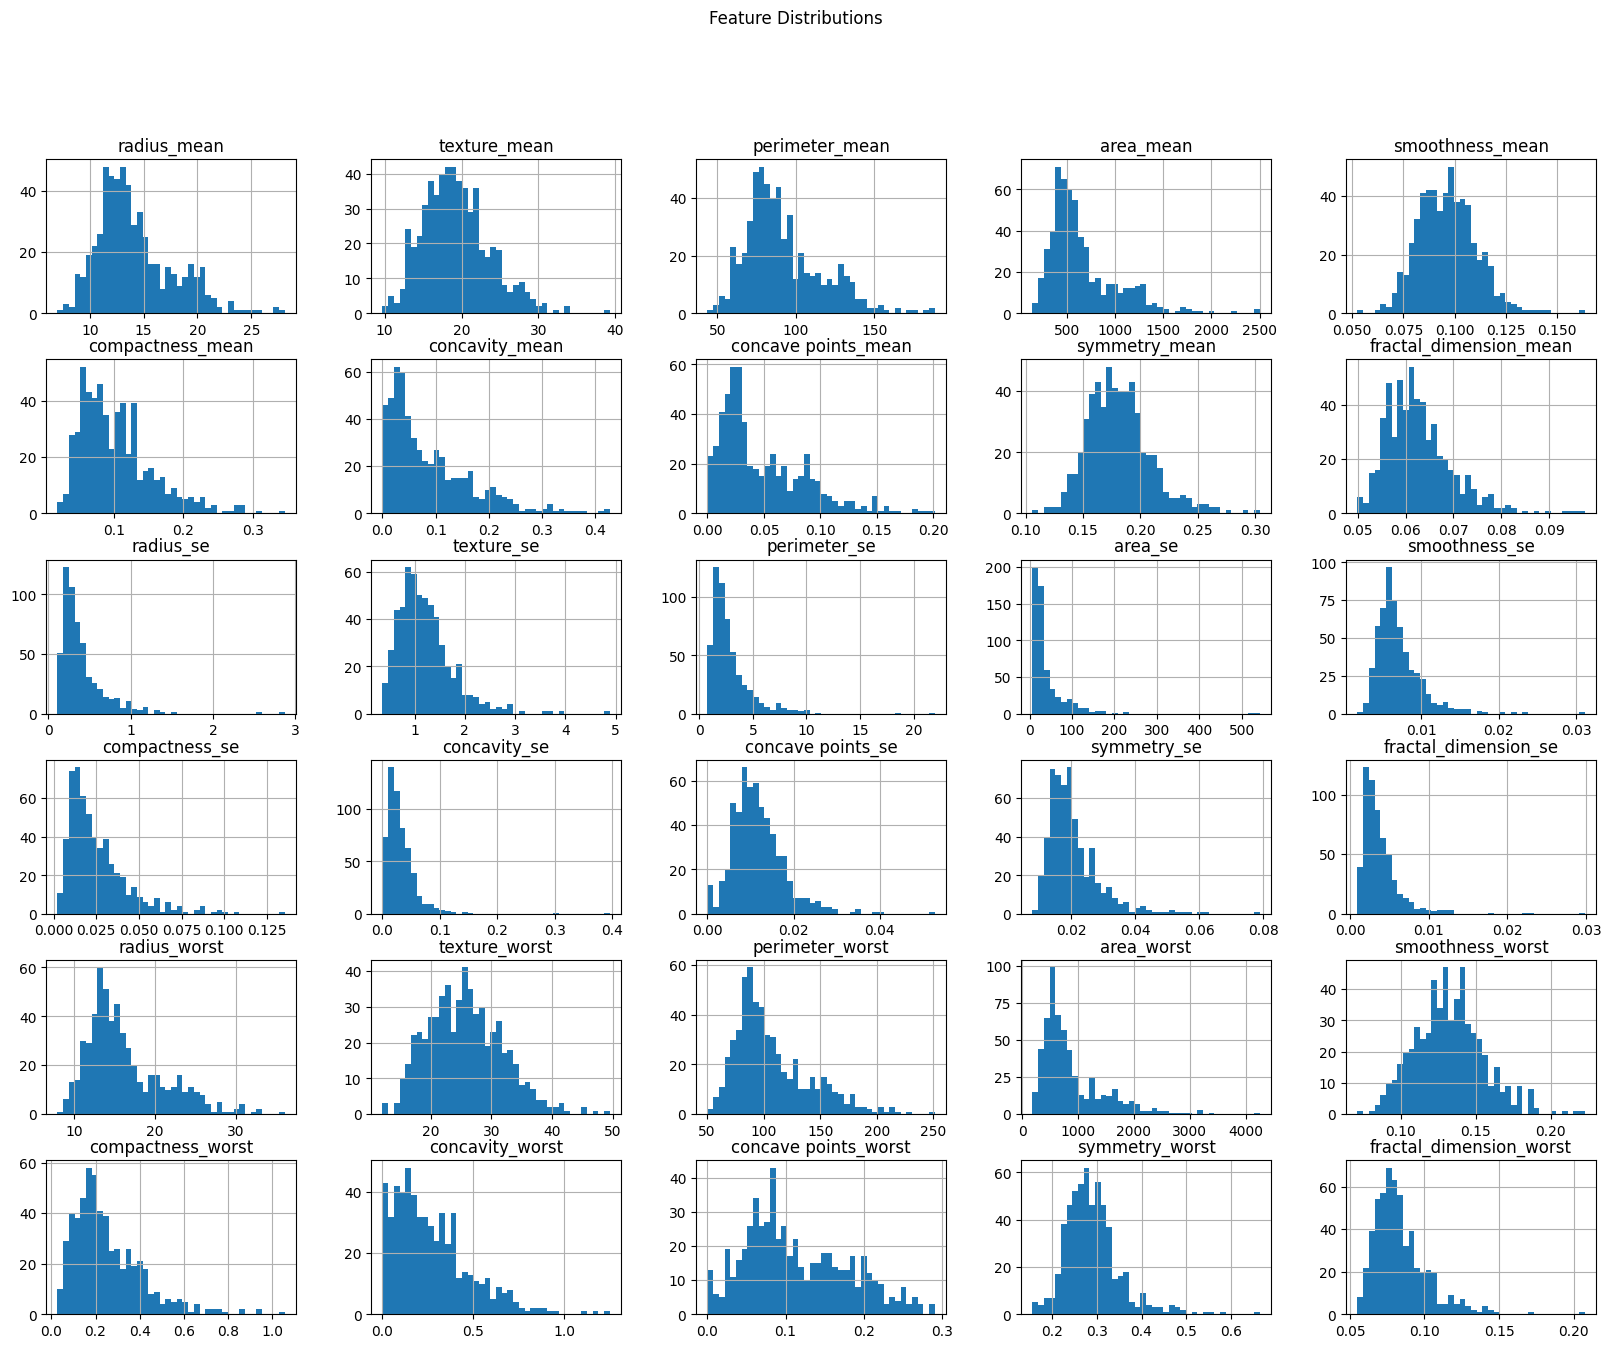

In [10]:
data.iloc[:, 1:].hist(bins=40, figsize=(20, 15))
plt.suptitle("Feature Distributions")
plt.show()

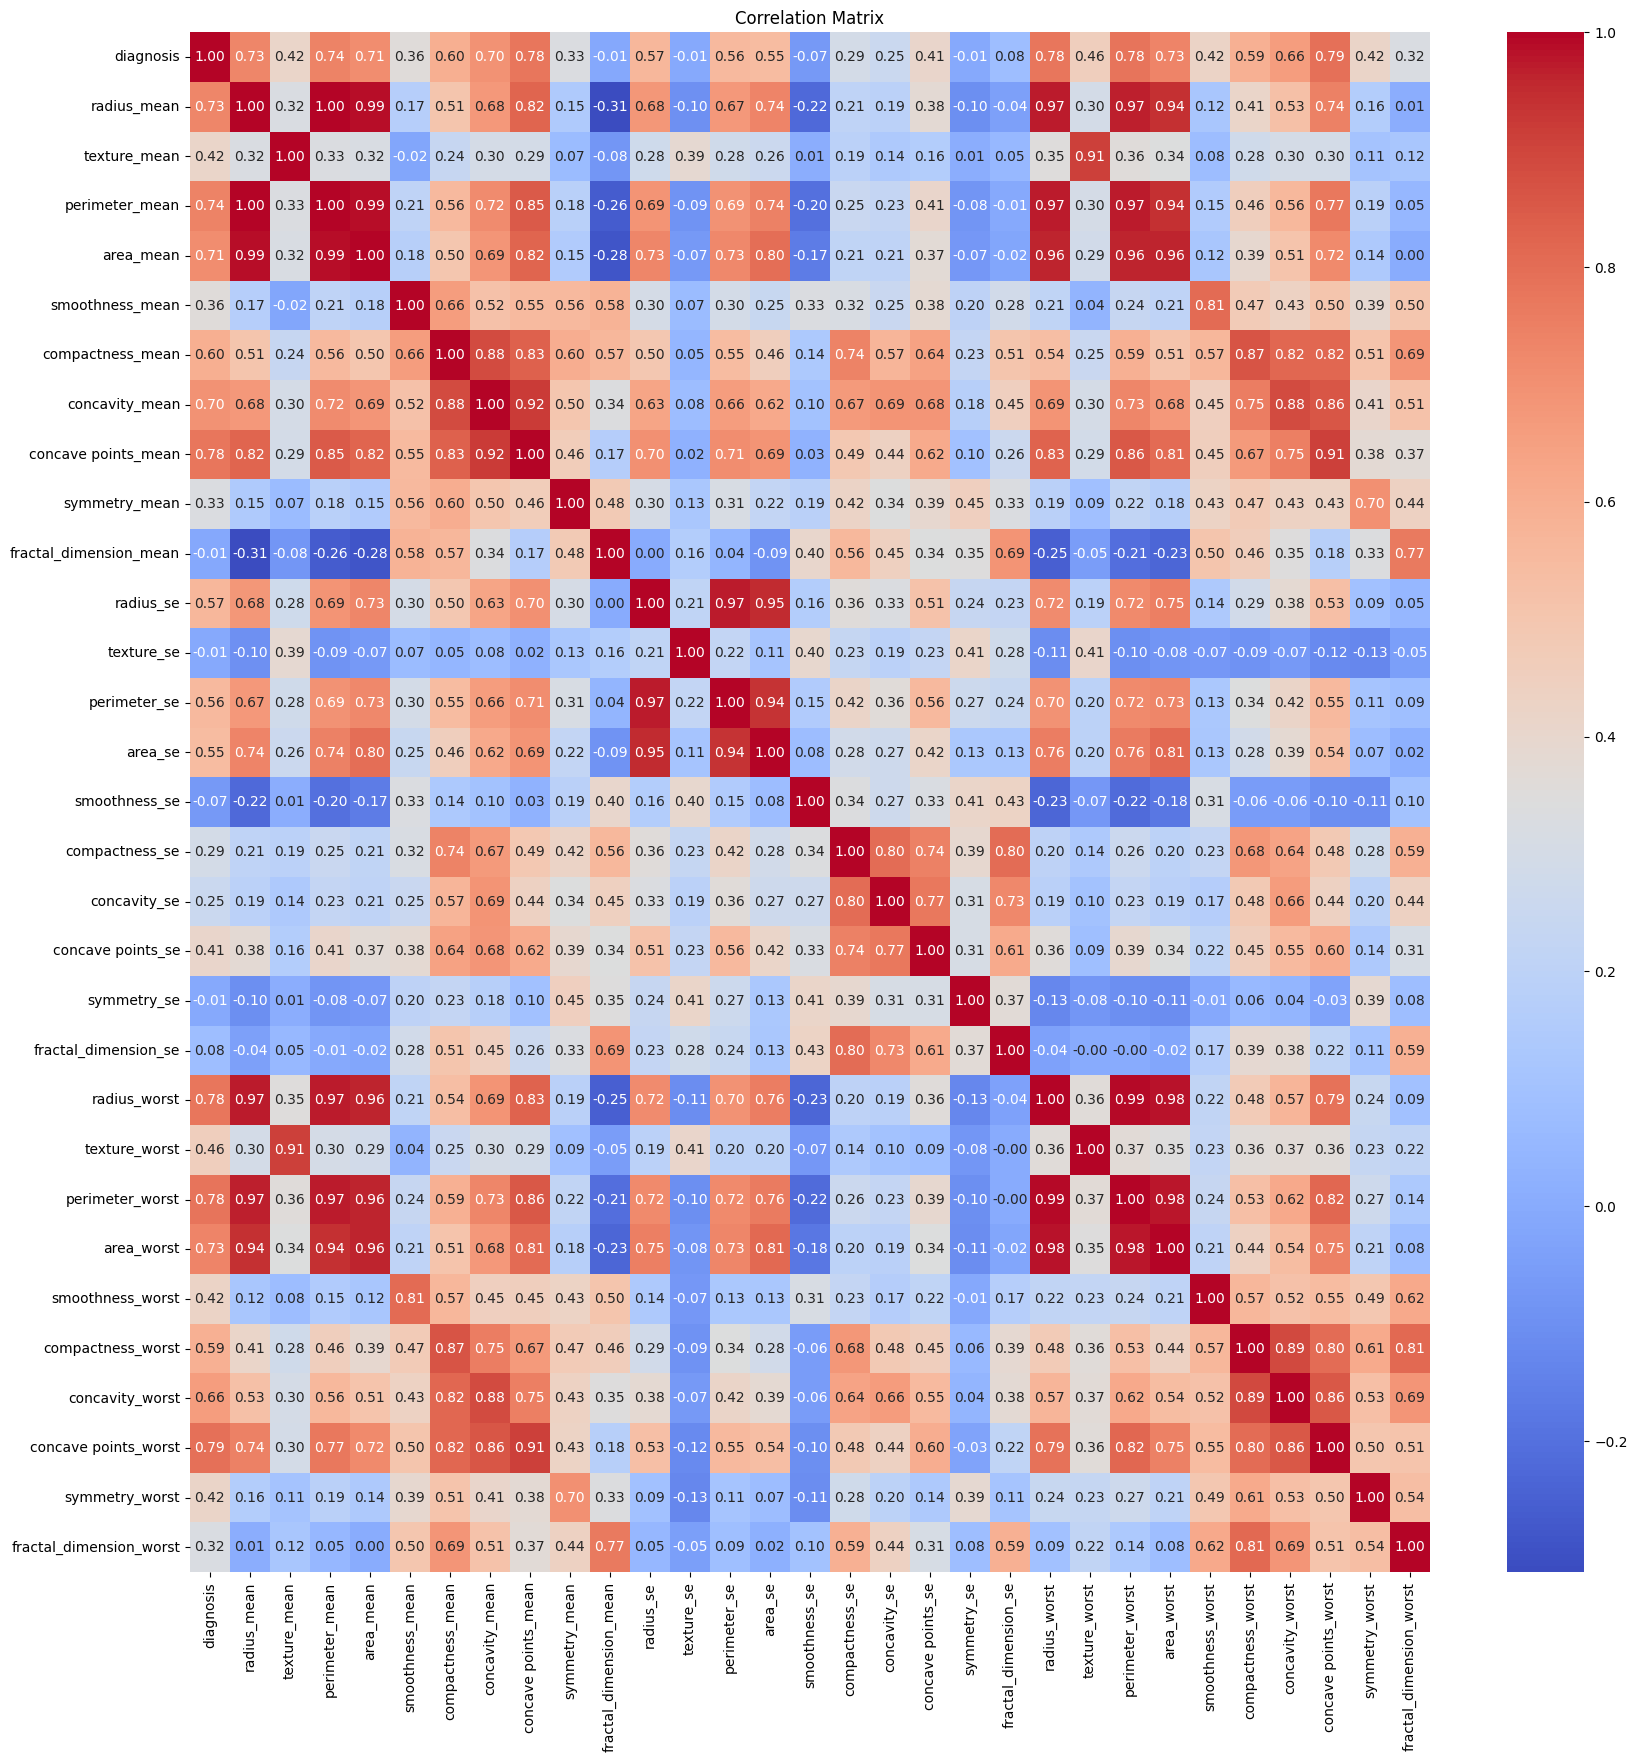

In [11]:
plt.figure(figsize=(20, 20))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [12]:
threshold = 0.8  
high_correlation = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold: 
            high_correlation.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

high_correlation_df = pd.DataFrame(high_correlation, columns=["Variable 1", "Variable 2", "Correlation Coefficient"])
high_correlation_df = high_correlation_df.sort_values(by="Correlation Coefficient", ascending=False)
print(high_correlation_df)

                 Variable 1           Variable 2  Correlation Coefficient
0            perimeter_mean          radius_mean                 0.997855
24          perimeter_worst         radius_worst                 0.993708
1                 area_mean          radius_mean                 0.987357
2                 area_mean       perimeter_mean                 0.986507
30               area_worst         radius_worst                 0.984015
31               area_worst      perimeter_worst                 0.977578
9              perimeter_se            radius_se                 0.972794
21          perimeter_worst       perimeter_mean                 0.970387
15             radius_worst          radius_mean                 0.969539
16             radius_worst       perimeter_mean                 0.969476
20          perimeter_worst          radius_mean                 0.965137
17             radius_worst            area_mean                 0.962746
27               area_worst           

# Data Preparation

In [13]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [14]:
def preprocess_data(filepath):
    scaler = StandardScaler()
    X = scaler.fit_transform(data.drop("diagnosis", axis=1))
    y = data["diagnosis"].values
    dump(scaler, "scaler.joblib")
    return X, y

In [15]:
print("X_scaled shape:", X.shape)
print("y shape:", y.shape)

X_scaled shape: (569, 30)
y shape: (569,)


In [16]:
X, y = preprocess_data(data)

In [17]:
print(pd.DataFrame(X).head())
print(y[:5])

         0         1         2         3         4         5         6   \
0  1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1  1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2  1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3 -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4  1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   

         7         8         9   ...        20        21        22        23  \
0  2.532475  2.217515  2.255747  ...  1.886690 -1.359293  2.303601  2.001237   
1  0.548144  0.001392 -0.868652  ...  1.805927 -0.369203  1.535126  1.890489   
2  2.037231  0.939685 -0.398008  ...  1.511870 -0.023974  1.347475  1.456285   
3  1.451707  2.867383  4.910919  ... -0.281464  0.133984 -0.249939 -0.550021   
4  1.428493 -0.009560 -0.562450  ...  1.298575 -1.466770  1.338539  1.220724   

         24        25        26        27        28        29  
0  1

# Train Validation and Tensorflow Dataset

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
def prepare_datasets(X_train, X_val, y_train, y_val, batch_size=None):
    if batch_size is None:
        batch_size = len(X_train)
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
    val_dataset = val_dataset.batch(batch_size)
    return train_dataset, val_dataset

In [20]:
train_ds, val_ds = prepare_datasets(X_train, X_val, y_train, y_val, batch_size=32)

# Modeling

In [21]:
model = Sequential([
    Input(shape=(train_ds.element_spec[0].shape[1],)),
    Dense(50, activation = "relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation = "sigmoid")
])

In [22]:
model.compile(optimizer="SGD",
             loss="binary_crossentropy",
             metrics=["accuracy", "AUC"])

In [23]:
early_stopping = EarlyStopping(monitor="val_loss",
                              patience=5,
                              verbose=1,
                              restore_best_weights=True)

# Model Training

In [24]:
history = model.fit(train_ds,
                   epochs=1000,
                   validation_data=val_ds,
                   verbose=1,
                   callbacks=[early_stopping])

Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - AUC: 0.5242 - accuracy: 0.4932 - loss: 1.0484 - val_AUC: 0.8680 - val_accuracy: 0.8070 - val_loss: 0.5625
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8273 - accuracy: 0.7265 - loss: 0.5772 - val_AUC: 0.9753 - val_accuracy: 0.9123 - val_loss: 0.4220
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9211 - accuracy: 0.8378 - loss: 0.4235 - val_AUC: 0.9872 - val_accuracy: 0.9211 - val_loss: 0.3571
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9379 - accuracy: 0.8460 - loss: 0.3708 - val_AUC: 0.9930 - val_accuracy: 0.9561 - val_loss: 0.3069
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9656 - accuracy: 0.8864 - loss: 0.3282 - val_AUC: 0.9946 - val_accuracy: 0.9561 - val_loss: 0.2770
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9543 - accuracy: 0.8491 - loss: 0.3371 - val_AUC: 0.9957 - val_accuracy: 0.9561 - val_loss: 0.2542
Epoch 7/1000
15/15 ━━━━━━━━━━━━━━━━━━━━

# Evaluating Model Results

In [25]:
def plot_training_history(history, train_loss="loss", train_metric="accuracy", val_loss = "val_loss", val_metric = "val_accuracy"):

  #Loss
  plt.figure(figsize=(10,5))
  plt.plot(history.history[train_loss], label = "Training Loss")
  plt.plot(history.history[val_loss], label = "Validation Loss")
  plt.title("Training and Validation Loss Over Epochs")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  #Accuracy
  plt.figure(figsize=(10,5))
  plt.plot(history.history[train_metric], label = f"Training: {train_metric}")
  plt.plot(history.history[val_metric], label = f"Validation: {val_metric}")
  plt.title(f"Training and Validation {train_metric} Loss Over Epochs")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

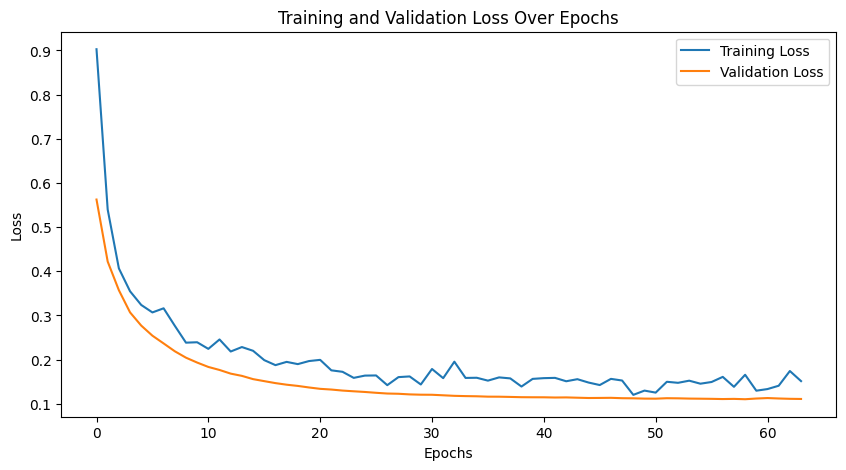

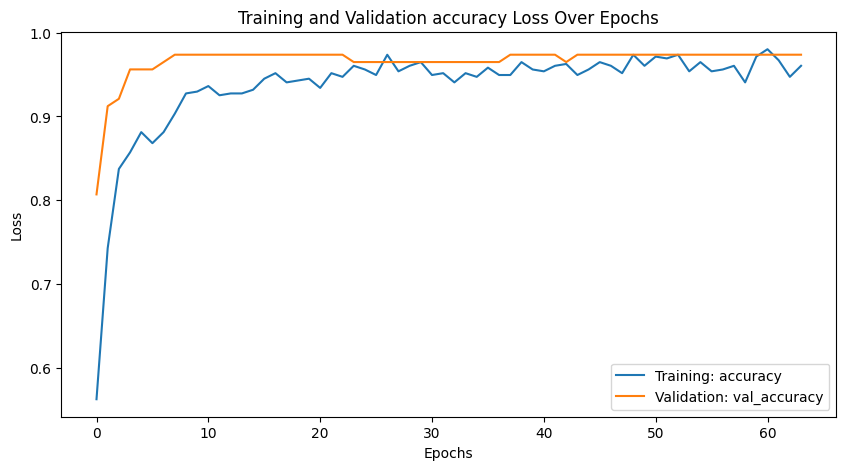

In [26]:
plot_training_history(history)

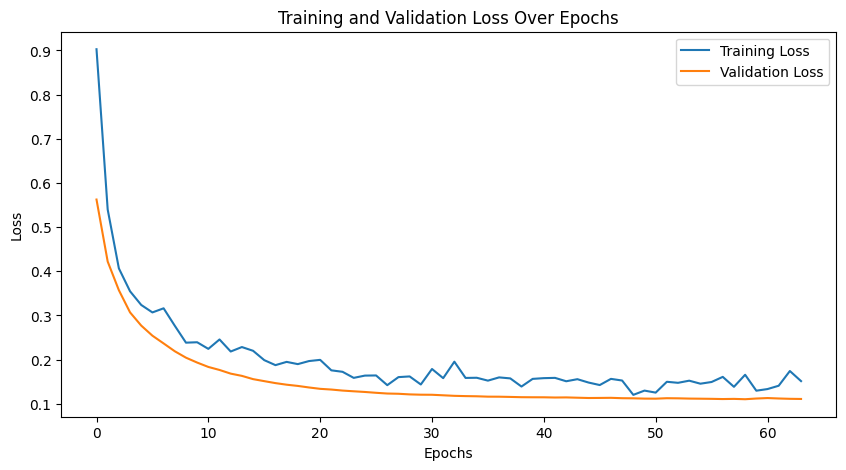

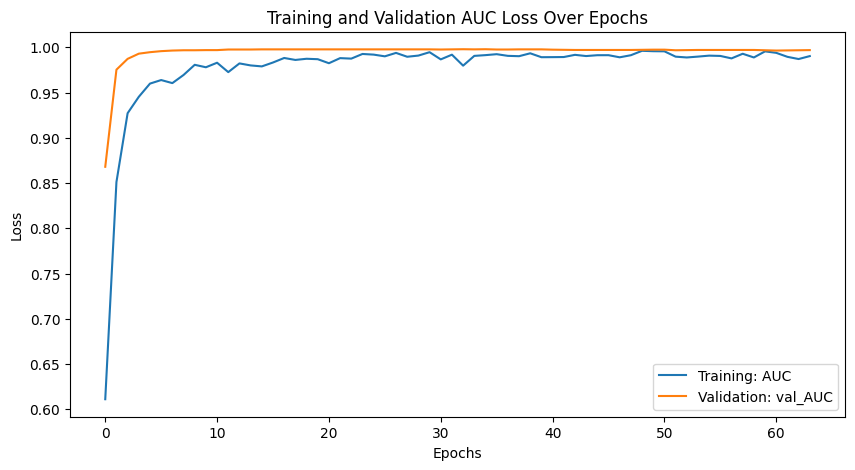

In [27]:
plot_training_history(history, train_metric="AUC", val_metric="val_AUC")

In [28]:
def get_best_epoch_details(history):
    val_losses = history.history["val_loss"]
    min_val_loss_index = val_losses.index(min(val_losses))
    best_epoch = min_val_loss_index + 1

    epoch_details = {}
    for key in history.history.keys():
        epoch_details[key] = history.history[key][min_val_loss_index]

    epoch_details["best_epoch"] = best_epoch
    return epoch_details

In [29]:
best_epoch_details = get_best_epoch_details(history)
print(f"Best Epoch Details: {best_epoch_details}")

Best Epoch Details: {'AUC': 0.9887657165527344, 'accuracy': 0.9406593441963196, 'loss': 0.1656535565853119, 'val_AUC': 0.9970520734786987, 'val_accuracy': 0.9736841917037964, 'val_loss': 0.11027374863624573, 'best_epoch': 59}


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │         1,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,803 (7.05 KB)

 Trainable params: 1,701 (6.64 KB)

 Non-trainable params: 100 (400.00 B)

 Optimizer params: 2 (12.00 B)